In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
datatrain = pd.read_csv("train.csv")
datatest  = pd.read_csv("test.csv")
ans =pd.read_csv("gender_submission.csv")
datatrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
datatest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


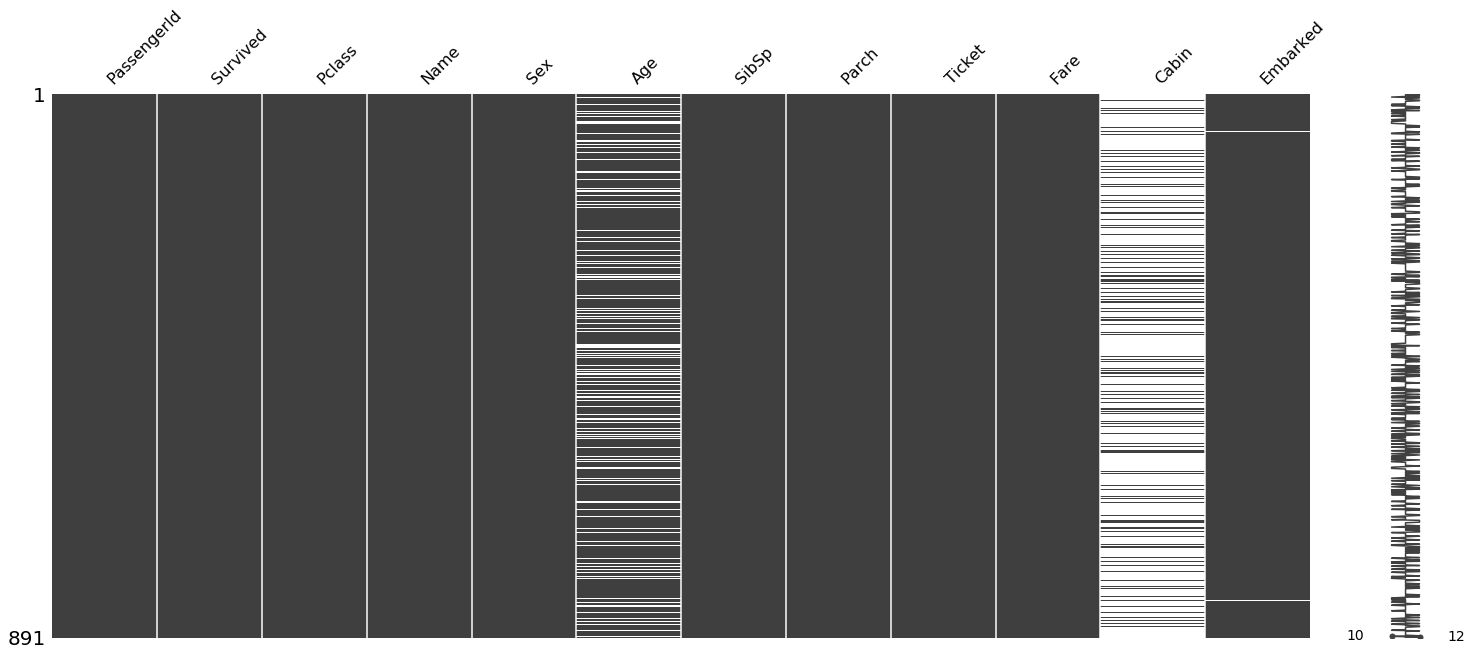

In [3]:
msno.matrix(datatrain) #checking for missing value

# Data Visualization

## How sex is depending on the survival?

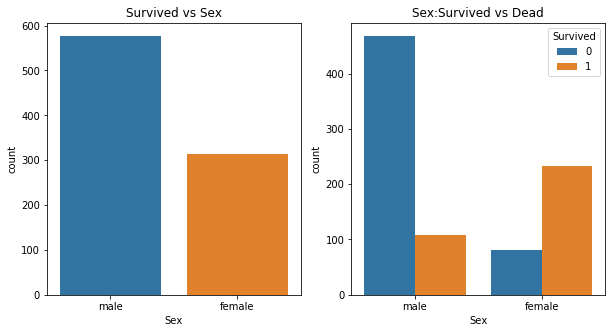

In [27]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot('Sex',data=datatrain,ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=datatrain,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## Despite of the no of men is more than no of women,
## The survival rate of women is higher

# Is Passenger class important for survival?

In [20]:
pd.crosstab(datatrain.Pclass,datatrain.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


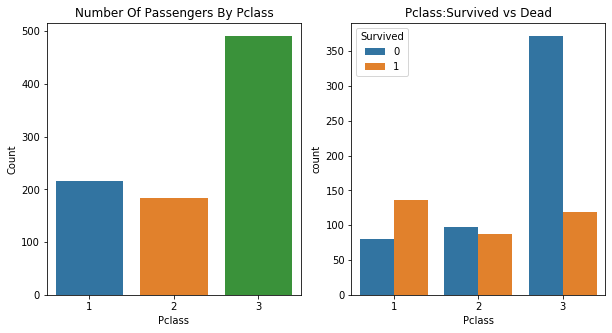

In [25]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot('Pclass',data=datatrain,ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=datatrain,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

##  we can clearly see PClass1 Passenger were the 1st choice for rescue

# What about Age?

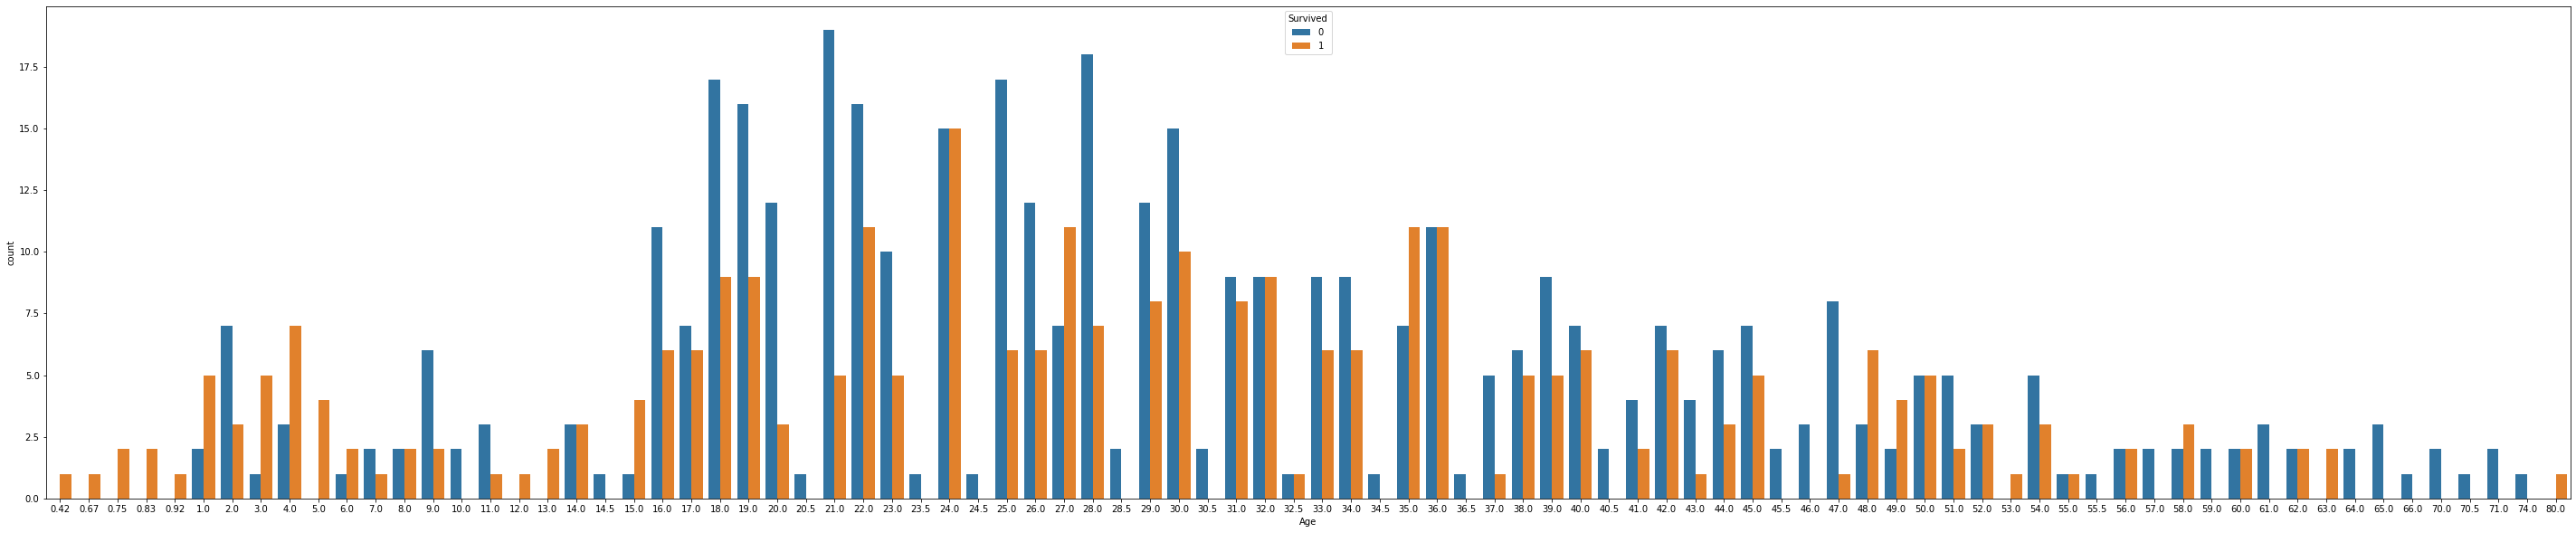

In [31]:
f,ax=plt.subplots(figsize=(50,10))
sns.countplot('Age',hue='Survived',data = datatrain,ax=ax)

## age<5 were saved in large no's

# Parch & SibSp

Text(0.5, 1.0, 'Sibsp vs Survived')

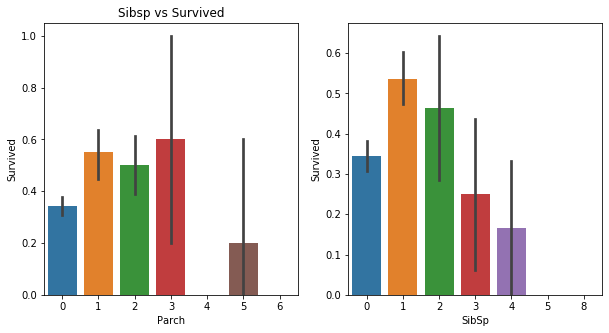

In [35]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.barplot('Parch','Survived',data = datatrain,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.barplot('SibSp','Survived',data = datatrain,ax=ax[1])
ax[0].set_title('Sibsp vs Survived')

## Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

# Heatmap

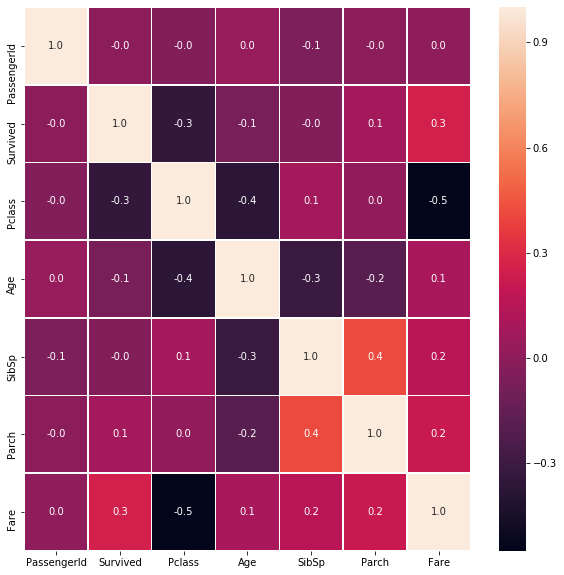

In [37]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(datatrain.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [62]:
X_train=datatrain.iloc[:,[2,4,6,7,9]].values #['Pclass', 'Sex','sibsp','Parch','Fare'] feature extraction
X_test =datatest.iloc[:,[1,3,5,6,8]].values  #['Pclass', 'Sex','sibsp','Parch','Fare'] feature extraction
y_train =datatrain.iloc[:,1].values          #['Survived']

In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X_train[:, 1] = labelencoder_X_1.fit_transform(X_train[:, 1])
onehotencoder = OneHotEncoder(categorical_features = [1])
X_train = onehotencoder.fit_transform(X_train).toarray()
X_train = X_train[:, 1:]


C:\Users\Indranil\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Indranil\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [64]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)

C:\Users\Indranil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X_test[:, 1] = labelencoder_X_1.fit_transform(X_test[:, 1])
onehotencoder = OneHotEncoder(categorical_features = [1])
X_test = onehotencoder.fit_transform(X_test).toarray()
X_test = X_test[:, 1:]

C:\Users\Indranil\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Indranil\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [66]:
y_pred = classifier.predict(X_test)

In [67]:
y_test = ans.iloc[:,1].values

Accuracy is %: 87.08133971291866


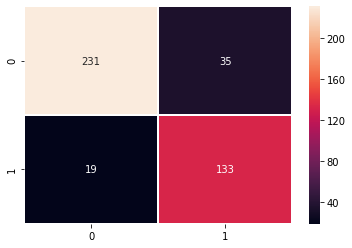

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, log_loss

ac = accuracy_score(y_test,y_pred)
print("Accuracy is %:" ,ac*100)

cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm,annot=True,linewidth=.5,fmt="d")